## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read in the telecom churn dataset.

https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv

In [2]:
# answer here
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv')



In [3]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [5]:
corr_matrix = data.corr()

In [6]:
corr_val = corr_matrix['Churn'] > abs(.01)
low_var = []

for _ in range(len(corr_val.index)):
  if corr_val.iloc[_] == False:
    low_var.append(corr_val.index[_])

In [7]:
low_var

['CustomerID',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'PercChangeMinutes',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'Handsets',
 'HandsetModels',
 'AgeHH1',
 'AgeHH2',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating']

In [8]:
data = data.drop(columns=low_var)

In [9]:
data.shape

(51047, 32)

In [10]:
data = data.drop(columns=['ServiceArea', 'ChildrenInHH',	'HandsetRefurbished',	'HandsetWebCapable',	'TruckOwner',	'RVOwner',	'Homeownership',	
                          'BuysViaMailOrder',	'OptOutMailings',	'NonUSTravel',	'OwnsComputer',	'HasCreditCard', 'NewCellphoneUser',	'NotNewCellphoneUser',	
                          'OwnsMotorcycle', 'HandsetPrice',	'MadeCallToRetentionTeam',	'CreditRating',	'PrizmCode',	'Occupation',	'MaritalStatus'])

In [11]:
data.shape

(51047, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    51047 non-null  int64  
 1   OverageMinutes           50891 non-null  float64
 2   RoamingCalls             50891 non-null  float64
 3   PercChangeRevenues       50680 non-null  float64
 4   MonthsInService          51047 non-null  int64  
 5   UniqueSubs               51047 non-null  int64  
 6   ActiveSubs               51047 non-null  int64  
 7   CurrentEquipmentDays     51046 non-null  float64
 8   RespondsToMailOffers     51047 non-null  object 
 9   RetentionCalls           51047 non-null  int64  
 10  RetentionOffersAccepted  51047 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.3+ MB


In [13]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50679 entries, 0 to 51043
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    50679 non-null  int64  
 1   OverageMinutes           50679 non-null  float64
 2   RoamingCalls             50679 non-null  float64
 3   PercChangeRevenues       50679 non-null  float64
 4   MonthsInService          50679 non-null  int64  
 5   UniqueSubs               50679 non-null  int64  
 6   ActiveSubs               50679 non-null  int64  
 7   CurrentEquipmentDays     50679 non-null  float64
 8   RespondsToMailOffers     50679 non-null  object 
 9   RetentionCalls           50679 non-null  int64  
 10  RetentionOffersAccepted  50679 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.6+ MB


Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [15]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.0MB/s 


In [16]:
# answer goes here
from sklearn.model_selection import train_test_split
from category_encoders.leave_one_out import LeaveOneOutEncoder


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
X = data.drop(columns='Churn')
y = data['Churn']

In [18]:
encoded = LeaveOneOutEncoder(cols='RespondsToMailOffers')
encoded.fit(X, y)

LeaveOneOutEncoder(cols=['RespondsToMailOffers'], drop_invariant=False,
                   handle_missing='value', handle_unknown='value',
                   random_state=None, return_df=True, sigma=None, verbose=0)

In [19]:
X = encoded.transform(X, y)

Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [20]:
# answer goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)




Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [21]:
# answer goes here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [22]:
# answer goes here
from sklearn.metrics import classification_report

y_pred = forest.predict(X_test)

After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

In [23]:
# answer goes here
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      2886

    accuracy                           1.00     10136
   macro avg       1.00      1.00      1.00     10136
weighted avg       1.00      1.00      1.00     10136



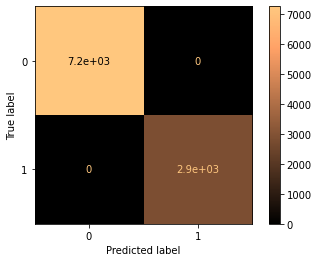

In [24]:
plot_confusion_matrix(forest, X_test, y_test, cmap='copper')
plt.show()

Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

In [25]:
# answer goes here
pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

RespondsToMailOffers       0.923070
CurrentEquipmentDays       0.023404
MonthsInService            0.016946
PercChangeRevenues         0.013173
OverageMinutes             0.009840
RoamingCalls               0.005746
UniqueSubs                 0.002969
RetentionCalls             0.002212
ActiveSubs                 0.002118
RetentionOffersAccepted    0.000522
dtype: float64